In [18]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [19]:
import torch 
import torchvision


In [20]:
model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True) 
                                                           

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [21]:
model.eval()

MaskRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(in

In [22]:
model = model.cuda()

In [68]:
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

In [69]:
len(COCO_INSTANCE_CATEGORY_NAMES)

91

In [155]:
from PIL import Image
from torchvision import transforms as T
import numpy as np
import requests
from io import BytesIO

In [169]:
from torch._C import device
def get_prediction(img_path, threshold=0.5):
  imag = Image.open(img_path)
  transform = T.Compose([T.ToTensor()])
  img = transform(imag)
  img = img.cuda() 
  pred = model([img])


  plt.imshow(imag)
  plt.show()

  pred_boxes = [[(i[0], i[1]), (i[2], i[3])] for i in list(pred[0]['boxes'].detach().cpu().numpy())]
  print(pred_boxes, "sdfdsfsdfsfs")
  pred_score = list(pred[0]['scores'].detach().cpu().numpy())
  masks = (pred[0]['masks'] > threshold).squeeze().detach().cpu().numpy()
  pred_class = [COCO_INSTANCE_CATEGORY_NAMES[i] for i in list(pred[0]['labels'].detach().cpu().numpy())]

  # pred_score = list(pred[0]['scores'].detach().cpu().numpy())
  # pred_t = [pred_score.index(x) for x in pred_score if x > threshold]#[-1]
  # masks = (pred[0]['masks'] > 0.5).squeeze().detach().numpy()
  # pred_class = [COCO_INSTANCE_CATEGORY_NAMES[i] for i in list(pred[0]['labels'].numpy())]
  # pred_boxes = [[(i[0], i[1]), (i[2], i[3])] for i in list(pred[0]['boxes'].detach().numpy())]
  # print(pred_boxes, "s")
  
  
  # masks = masks[:pred_t+1]
  # pred_boxes = pred_boxes[:pred_t+1]
  # pred_class = pred_class[:pred_t+1]
  return masks, pred_boxes, pred_class

In [170]:
import matplotlib.pyplot as plt
import cv2
import random
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 

In [171]:
def random_color_masks(image):
  
  colors = [[0, 255, 0],[0, 0, 255],[255, 0, 0],[0, 255, 255],[255, 255, 0],[255, 0, 255],[80, 70, 180], [250, 80, 190],[245, 145, 50],[70, 150, 250],[50, 190, 190]]
  r = np.zeros_like(image).astype(np.uint8)
  g = np.zeros_like(image).astype(np.uint8)
  b = np.zeros_like(image).astype(np.uint8)
  r[image==1], g[image==1], b[image==1] = colors[random.randrange(0, 10)]
  colored_mask = np.stack([r,g,b], axis=2)
  return colored_mask

In [172]:
def instance_segmentation(img_path, threshold=0.5, rect_th=0.005,
                          text_size=1, text_th=0.02):
  masks, boxes, pred_cls = get_prediction(img_path, threshold=threshold)
  
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
  for i in range(len(masks)):
    rgb_mask = random_color_masks(masks[i])
    img = cv2.addWeighted(img, 1, rgb_mask, 0.5, 0)
    pt1 = tuple(int(x) for x in boxes[i][0])
    pt2 = tuple(int(x) for x in boxes[i][1])
    cv2.rectangle(img, pt1, pt2, color=(0, 255, 0), thickness=rect_th)
    # cv2.putText(img, pred_cls[i], pt1, cv2.FONT_HERSHEY_SIMPLEX, text_size, (0, 255, 0), thickness=text_th)
  return img, pred_cls, masks[i]

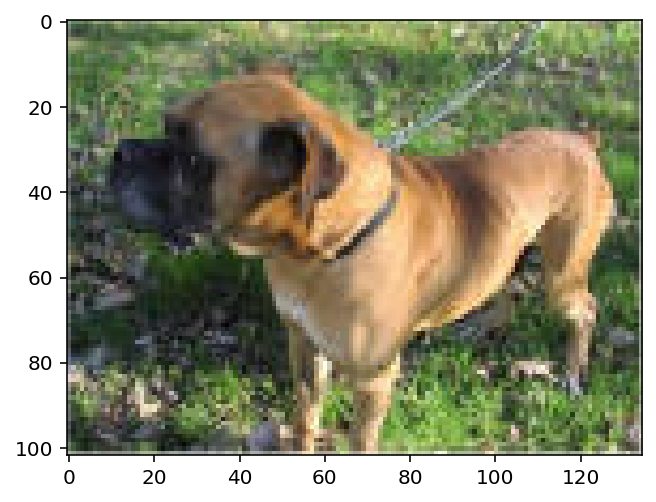

[[(5.48887, 11.829426), (132.45218, 102.0)], [(76.79574, 69.662254), (109.42817, 101.43994)], [(11.951518, 8.673428), (135.0, 101.903)], [(8.498324, 27.563519), (36.466373, 51.99933)], [(21.662304, 8.10081), (127.88498, 102.0)], [(101.94234, 61.640274), (116.271736, 79.99473)], [(5.9627566, 12.531263), (80.68521, 96.95992)], [(42.313183, 20.32418), (130.09686, 98.527084)], [(8.324121, 12.510445), (76.71211, 55.845825)], [(8.847126, 27.362932), (36.03586, 51.73734)], [(10.2727165, 50.9391), (50.45242, 97.89494)], [(83.33357, 61.00209), (105.982735, 78.39545)], [(4.533056, 21.813702), (70.35414, 102.0)], [(75.15478, 56.222916), (121.619965, 99.1958)], [(9.105661, 23.173773), (42.59743, 54.312096)], [(9.973012, 27.608244), (34.68828, 49.730404)], [(4.311486, 16.931803), (74.71225, 99.05394)]] sdfdsfsdfsfs


In [175]:
img, pred_classes, masks = instance_segmentation('/content/drive/MyDrive/coolab/Sample_data/11.jpg', rect_th=1, text_th=4)
# print(img,"hiiiiiiiiiiiiiii")
# print(pred_classes,"yyyyyyyyyyyyyyyy")
# print(masks,"uuuuuuuuuuuuuuuuuu")

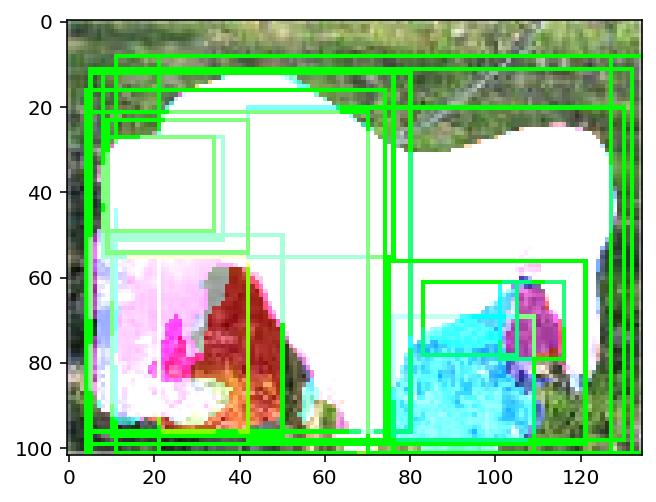

In [176]:
plt.imshow(img)